In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import spectral
from scipy import sparse
import scipy.sparse.linalg as spla

Let's try to solve viscous Burgers' equation:
$$ \partial_t u - \nu \partial_x^2 u = -u \partial_x u $$

In [2]:
x_basis = spectral.Fourier(64)
domain = spectral.Domain([x_basis])
dtype = np.complex128
u = spectral.Field(domain, dtype=dtype)
dudx = spectral.Field(domain, dtype=dtype)
RHS = spectral.Field(domain, dtype=dtype)

In [3]:
# x_basis.wavenumbers(dtype)
domain.grids

<bound method Domain.grids of <spectral.Domain object at 0x7fa4685e3340>>

In [4]:
x = x_basis.grid()
u.require_grid_space()
u.data = 0.5*(np.sin(x) + 1)

In [5]:
domain.bases[0].wavenumbers(dtype)

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31., -32.,
       -31., -30., -29., -28., -27., -26., -25., -24., -23., -22., -21.,
       -20., -19., -18., -17., -16., -15., -14., -13., -12., -11., -10.,
        -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.])

<IPython.core.display.Javascript object>


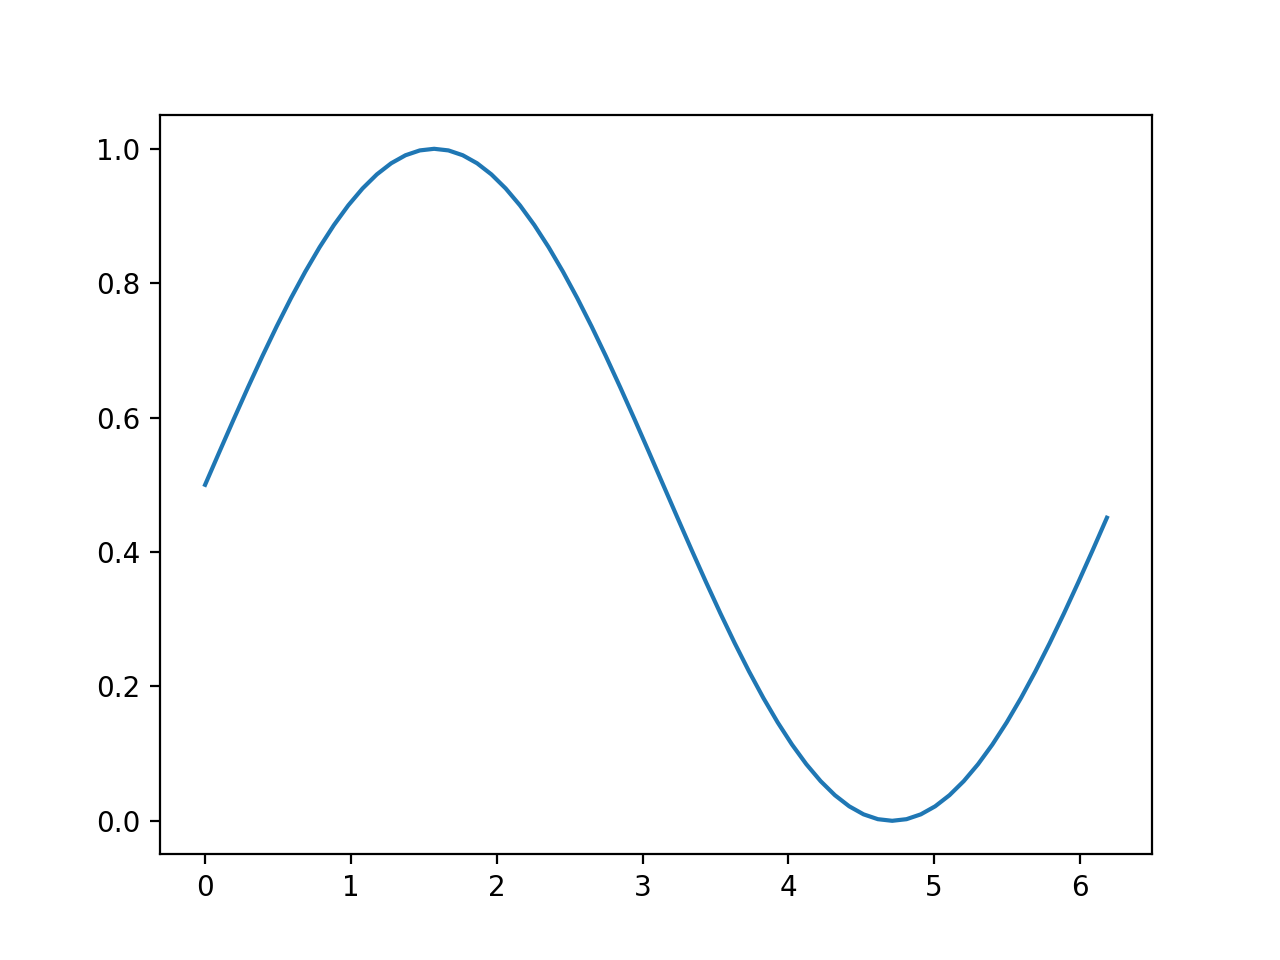

In [6]:
plt.figure()
plt.plot(x, u.data)

In [7]:
# parameters
nu = 1e-2
dt = 1e-1

In [8]:
N = x_basis.N
kx = x_basis.wavenumbers(dtype)

In [9]:
# take a timestep:
u.require_coeff_space()
dudx.require_coeff_space()
dudx.data = 1j*kx*u.data
u.require_grid_space()
dudx.require_grid_space()
RHS.require_grid_space()
RHS.data = -u.data * dudx.data
RHS.require_coeff_space()

diag = 1/dt + nu*kx**2
LHS = sparse.diags(diag)
u.require_coeff_space()
RHS.data += u.data/dt
u.data = spla.spsolve(LHS, RHS.data)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:144: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  warn('spsolve requires A be CSC or CSR matrix format',


<IPython.core.display.Javascript object>


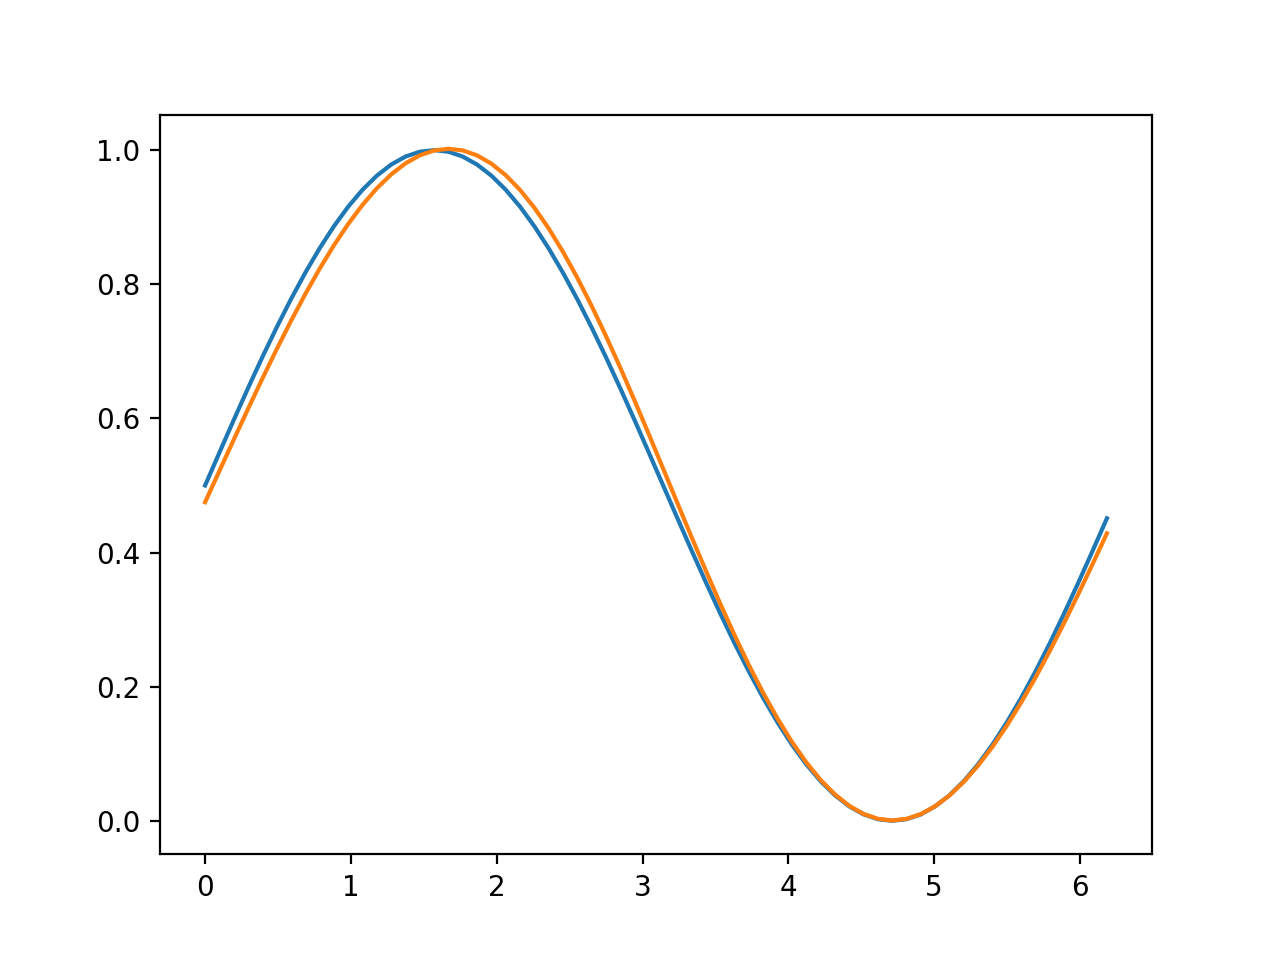

In [10]:
plt.figure()
u.require_grid_space()
plt.plot(x, 0.5*(np.sin(x)+1))
plt.plot(x, u.data.real)

In [11]:
for i in range(10):
    # take a timestep:
    u.require_coeff_space()
    dudx.require_coeff_space()
    dudx.data = 1j*kx*u.data
    u.require_grid_space()
    dudx.require_grid_space()
    RHS.require_grid_space()
    RHS.data = -u.data * dudx.data
    RHS.require_coeff_space()

    diag = 1/dt + nu*kx**2
    LHS = sparse.diags(diag)
    u.require_coeff_space()
    RHS.data += u.data/dt
    u.data = spla.spsolve(LHS, RHS.data)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:144: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  warn('spsolve requires A be CSC or CSR matrix format',


<IPython.core.display.Javascript object>


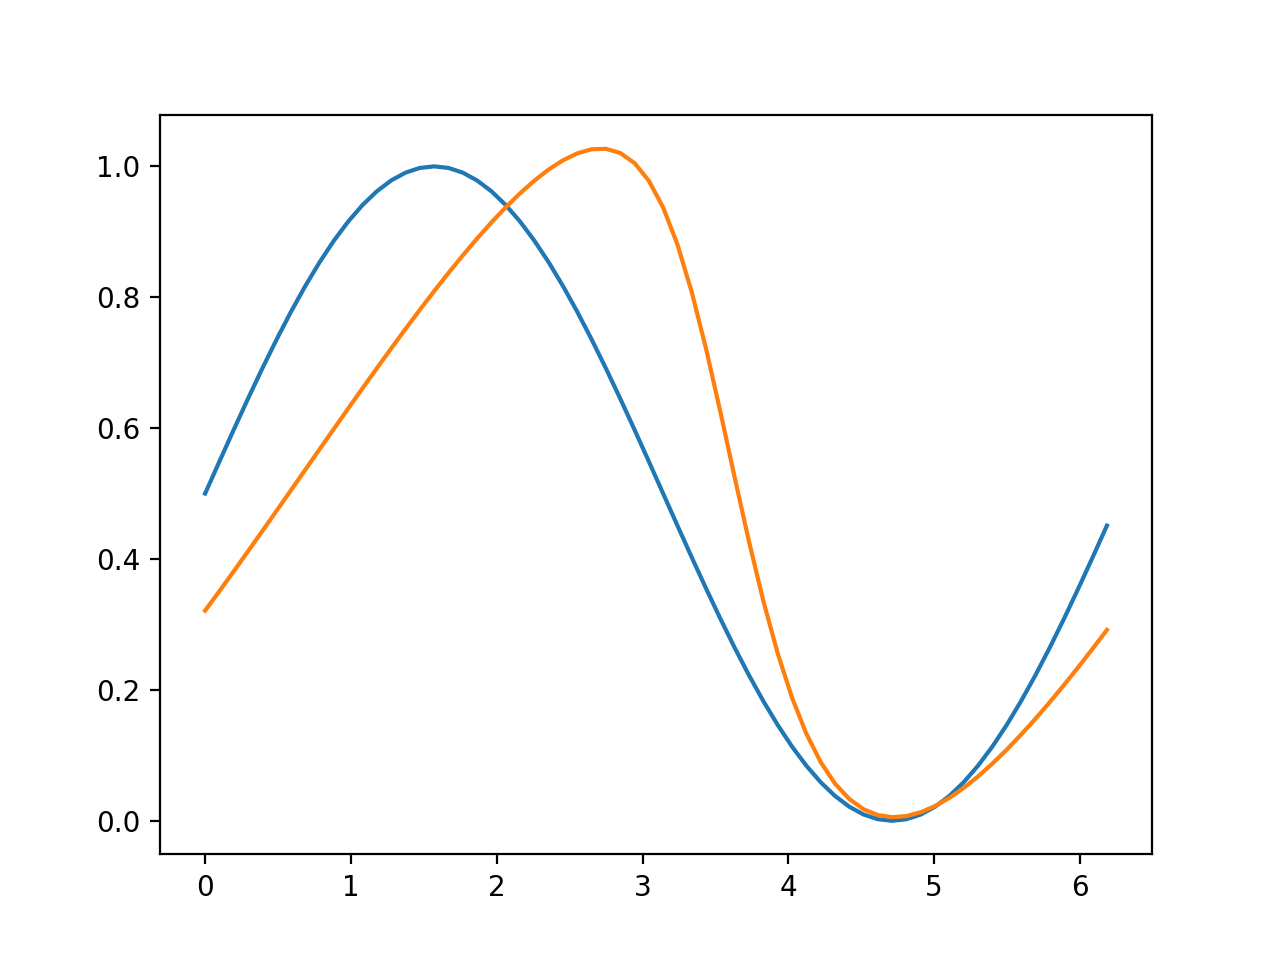

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


In [12]:
plt.figure()
u.require_grid_space()
plt.plot(x, 0.5*(np.sin(x)+1))
plt.plot(x, u.data)

In [13]:
u.data

array([0.32103477-9.09582838e-17j, 0.35091425-2.59267876e-18j,
       0.38121421+1.06635014e-17j, 0.41185756+2.67219738e-16j,
       0.44277101+2.45686491e-16j, 0.4738841 +1.38452128e-16j,
       0.50512825-8.80463301e-17j, 0.53643588-2.81932042e-16j,
       0.5677396 +1.42429861e-16j, 0.5989713 -3.96682002e-17j,
       0.63006125-1.26923851e-16j, 0.66093716+2.10432701e-16j,
       0.69152308+2.70754621e-16j, 0.72173819+5.79649631e-16j,
       0.75149539-5.91796009e-16j, 0.7806996 +8.62714017e-17j,
       0.80924574+1.15804262e-15j, 0.8370162 -1.69568279e-15j,
       0.86387766-4.75059072e-16j, 0.889677  +1.22478710e-15j,
       0.91423602+2.23714904e-15j, 0.93734435-1.50953517e-15j,
       0.95874977-1.89909764e-15j, 0.97814464+2.38954211e-15j,
       0.99514623-2.83308328e-16j, 1.00926743-8.71518421e-16j,
       1.01987242+4.61283081e-16j, 1.02611142+6.05949654e-16j,
       1.02683155+3.48272980e-16j, 1.02047691-1.06680571e-15j,
       1.00502589-4.18551247e-17j, 0.97806644+6.8141722

What sets the stability limit for the timestep size?

In [14]:
nu = 1e-2
c = 1
dt = 3e-2
kx = x_basis.wavenumbers(dtype)
A = np.sqrt(1 + kx**2*c**2*dt**2) / (1 + nu*kx**2*dt)

<IPython.core.display.Javascript object>


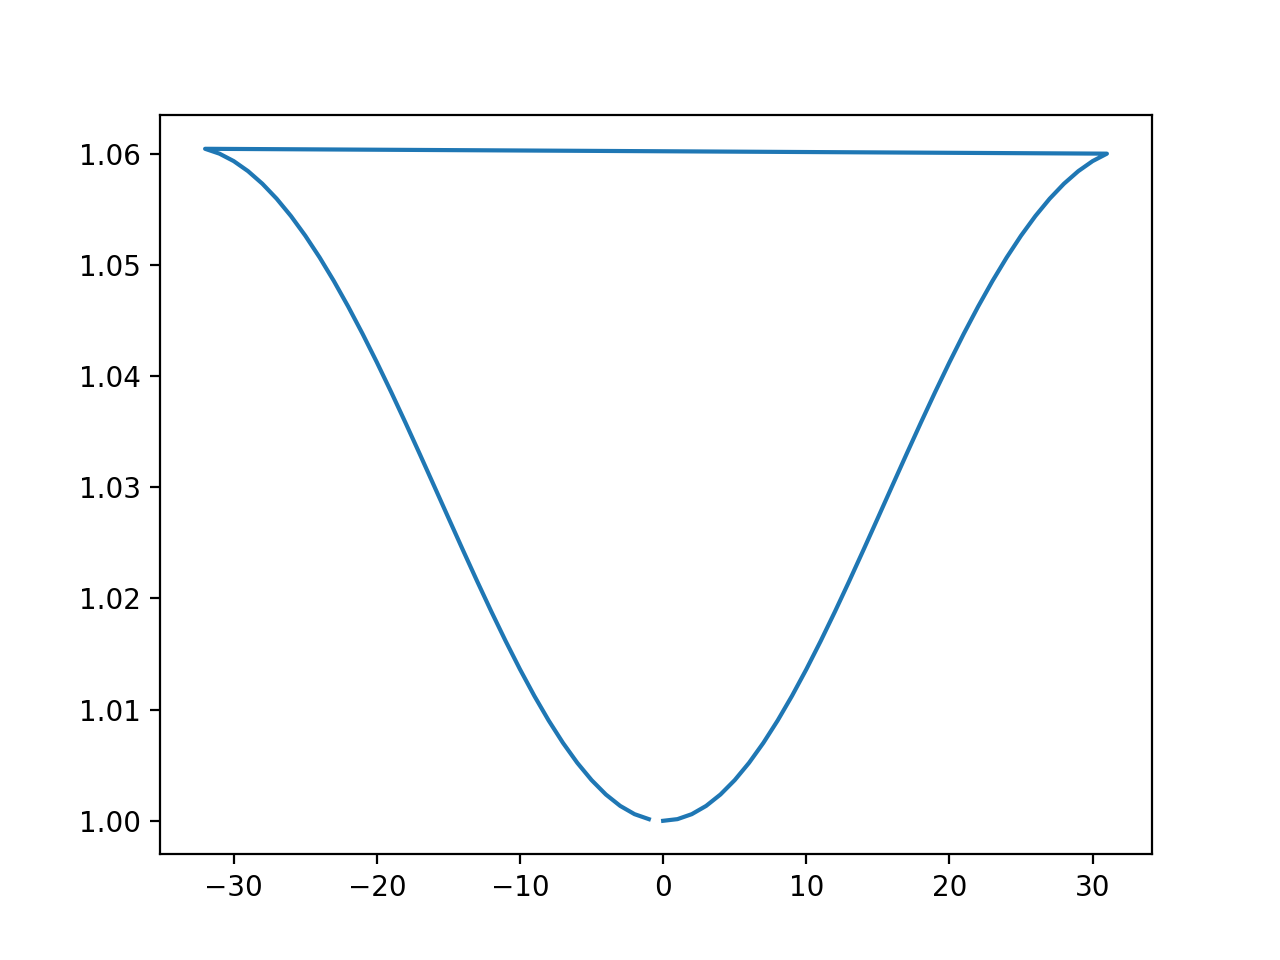

In [15]:
plt.figure()
plt.plot(kx, A)

What happens if we change the spatial resolution?

In [16]:
u_list = []
kx_list = []

In [17]:
x_basis = spectral.Fourier(512)
domain = spectral.Domain([x_basis])
dtype = np.complex128
u = spectral.Field(domain, dtype=dtype)
dudx = spectral.Field(domain, dtype=dtype)
RHS = spectral.Field(domain, dtype=dtype)

x = x_basis.grid()
u.require_grid_space()
u.data = 0.5*(np.sin(x)+1)

N = x_basis.N
kx = x_basis.wavenumbers(dtype)

nu = 1e-2
dt = 1e-2
t_end = 5
num_steps = int(t_end/dt)

<IPython.core.display.Javascript object>


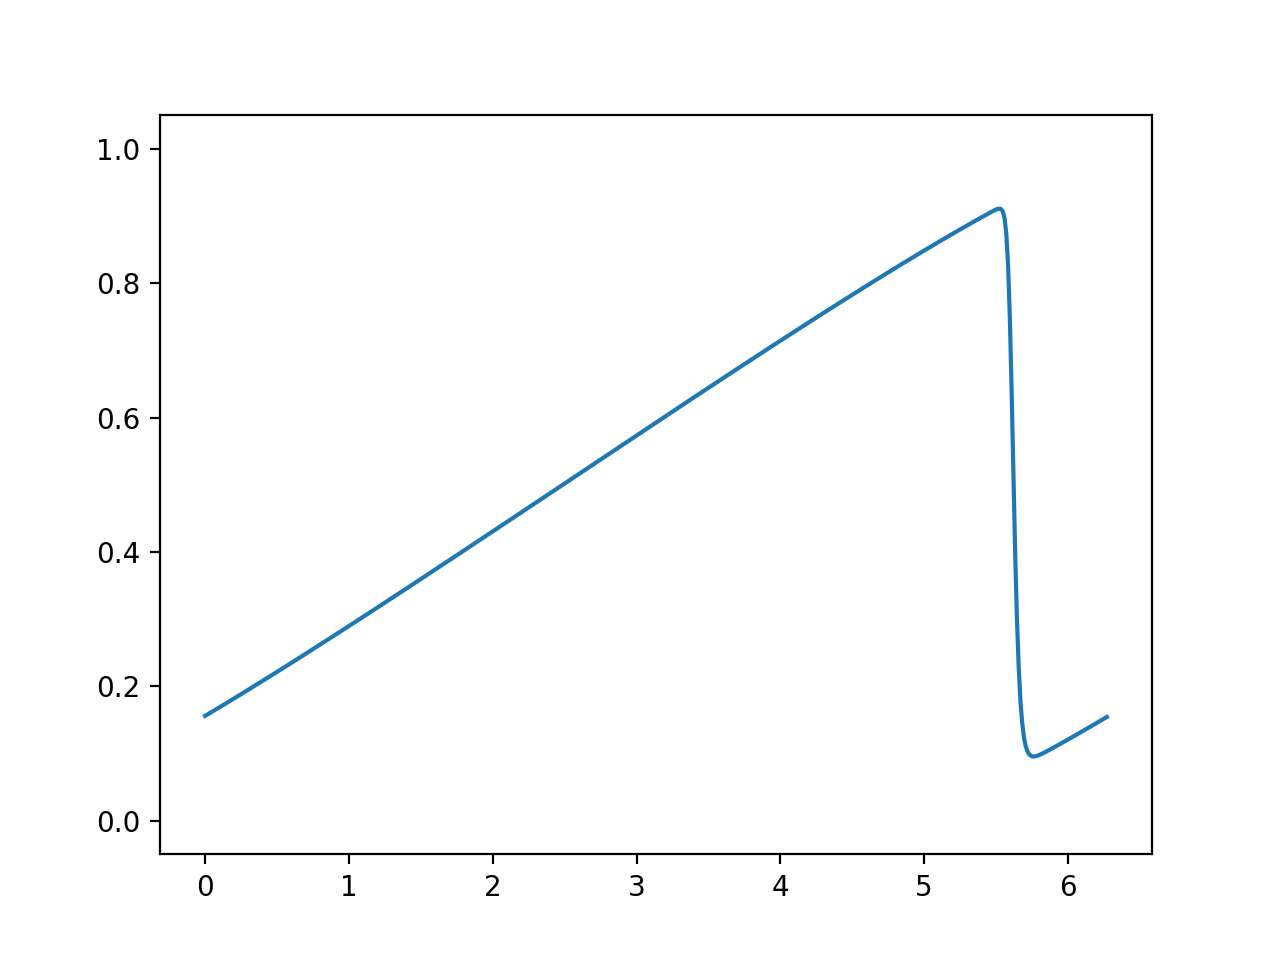

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:144: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  warn('spsolve requires A be CSC or CSR matrix format',


In [18]:
fig = plt.figure()
u.require_grid_space()
p, = plt.plot(x, u.data)
fig.canvas.draw()

for i in range(num_steps):
    # take a timestep:
    u.require_coeff_space()
    dudx.require_coeff_space()
    dudx.data = 1j*kx*u.data
    u.require_grid_space()
    dudx.require_grid_space()
    RHS.require_grid_space()
    RHS.data = -u.data * dudx.data
    RHS.require_coeff_space()

    diag = 1/dt + nu*kx**2
    LHS = sparse.diags(diag)
    u.require_coeff_space()
    RHS.data += u.data/dt
    u.data = spla.spsolve(LHS, RHS.data)
    
    if i % 5 == 0:
        u.require_grid_space()
        p.set_ydata(u.data.real)
        fig.canvas.draw()

In [68]:
u.require_coeff_space()
u_list.append(u.data)
kx_list.append(x_basis.wavenumbers(dtype))

<IPython.core.display.Javascript object>


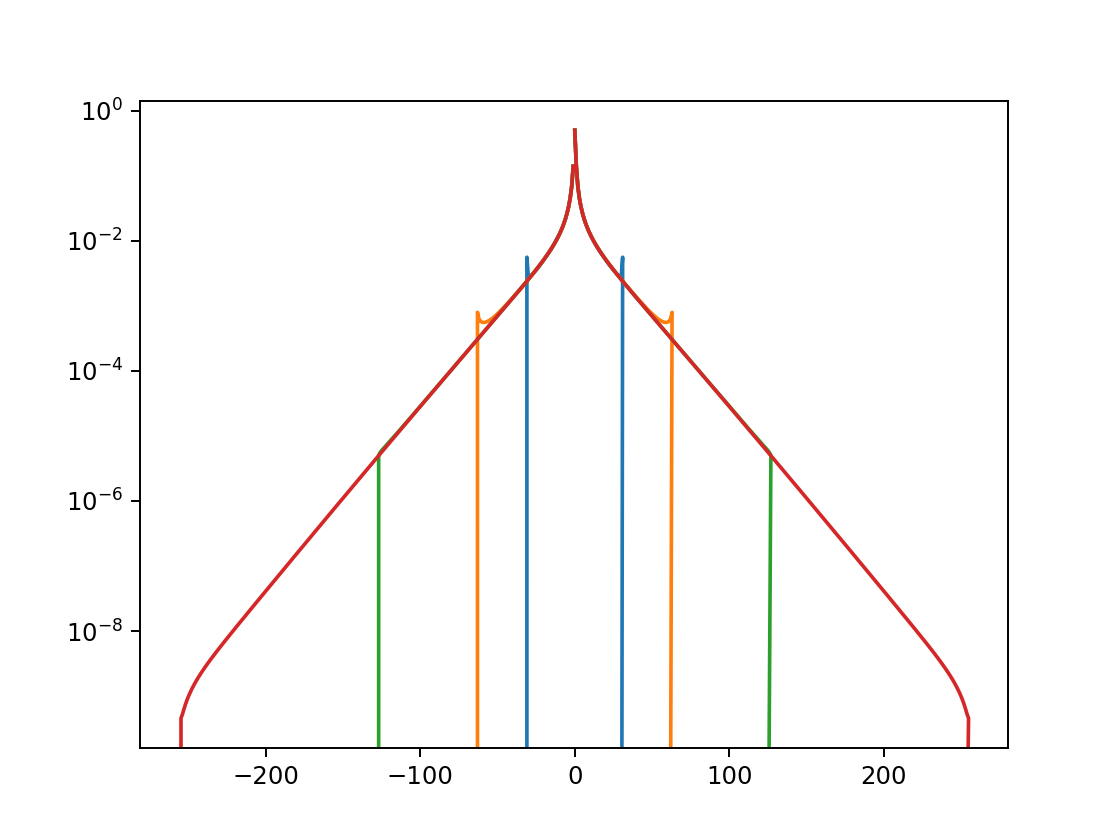

In [80]:
plt.figure()
for u, kx in zip(u_list, kx_list):
    plt.plot(kx, np.abs(u))
plt.yscale('log')